In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import os

In [3]:
os.chdir('/content/drive/MyDrive/IIMA_Internship/Energy_Sector')

In [4]:
stock_data = {}
industry_data = {}
Month_df = {}
Month_df_industry = {}
Results = {}

In [5]:
# List of stock symbols
stocks_list = ['IOC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'NTPC.NS', 'COALINDIA.NS',
          'ONGC.NS', 'BPCL.NS', 'ADANIPOWER.NS', 'TATAPOWER.NS', 'ADANIGREEN.NS',
          'AEGISLOG.NS', 'IGL.NS', 'MGL.NS', 'HINDPETRO.NS', 'CASTROLIND.NS',
          'GAIL.NS', 'GUJGASLTD.NS', 'PETRONET.NS', 'GSPL.NS', 'ATGL.NS',
          'OIL.NS', 'CHENNPETRO.NS', 'GMDCLTD.NS', 'MRPL.NS', 'SUZLON.NS',
          'INOXWIND.NS'
]

# stocks_list = ['XOM', 'CVX', '601857.SS', '600938.SS', 'WDS.AX',
#           'STO.AX', 'SHEL.L', 'BP-A.L', '1605.T', '5020.T'
# ]



# Dictionary mapping companies to industries
industry_dict = {
    'IOC': 'Refineries & Marketing',
    'POWERGRID': 'Power - Transmission',
    'RELIANCE': 'Refineries & Marketing',
    'NTPC': 'Power Generation',
    'COALINDIA': 'Coal',
    'ONGC': 'Oil Exploration & Production',
    'BPCL': 'Refineries & Marketing',
    'ADANIPOWER': 'Integrated Power Utilities',
    'TATAPOWER': 'Integrated Power Utilities',
    'ADANIGREEN': 'Power Generation',
    'AEGISLOG': 'Trading - Gas',
    'IGL': 'LPG/CNG/PNG/LNG Supplier',
    'MGL': 'LPG/CNG/PNG/LNG Supplier',
    'HINDPETRO': 'Refineries & Marketing',
    'CASTROL': 'Lubricants',
    'GAIL': 'Gas Transmission/Marketing',
    'GUJGASLTD': 'LPG/CNG/PNG/LNG Supplier',
    'PETRONET': 'LPG/CNG/PNG/LNG Supplier',
    'GSPL': 'Gas Transmission/Marketing',
    'ATGL': 'LPG/CNG/PNG/LNG Supplier',
    'OIL': 'Oil Exploration & Production',
    'CHENNPETRO': 'Refineries & Marketing',
    'GMDCLTD': 'Industrial Minerals',
    'MRPL': 'Refineries & Marketing',
    'SUZLON': 'Heavy Electrical Equipment',
    'INOXWIND': 'Heavy Electrical Equipment'

}

In [6]:
def download_stock_data(stocks_list, start_date, end_date):

  # Specify the directory to save the data
  save_directory = '/content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed'
  # Create the directory if it doesn't exist
  os.makedirs(save_directory, exist_ok=True)

# Fetching data for each stock
  for stock in stocks_list:
      # Download data from Yahoo Finance
      data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, multi_level_index=False)

      # Extract company name from the stock symbol (remove ".NS")
      company_name = stock.split('.')[0]

      # Perform transformations
      data['Previous day close price'] = data['Adj Close'].shift(1).squeeze()
      data['Change in price'] = data['Adj Close'] - data['Previous day close price']
      data['Percent change in price'] = data['Adj Close'].pct_change()
      data['Previous day volume'] = data['Volume'].shift(1).squeeze()
      data['Change in volume'] = data['Volume'] - data['Previous day volume']
      data['Percent change in volume'] = data['Volume'].pct_change()

      # Obtaining Moving averages (5-day, 20-day, 50-day, 100-day)

      # data['5_day_MA'] = data['Adj Close'].rolling(window = 5).mean()
      # data['20_day_MA'] = data['Adj Close'].rolling(window = 20).mean()
      # data['50_day_MA'] = data['Adj Close'].rolling(window = 50).mean()
      # data['100_day_MA'] = data['Adj Close'].rolling(window = 100).mean()

      # Add the industry information to the data
      data['Industry'] = industry_dict.get(company_name, 'Unknown')



      # Save the updated data to a CSV file in the specified directory
      file_path = os.path.join(save_directory, f'{company_name}.csv')
      data.to_csv(file_path, index=True)

      # Optionally, display a message after saving
      print(f'Successfully saved updated data for {company_name} at {file_path}')


  print("All files have been updated and saved successfully!")

In [7]:
download_stock_data(stocks_list, '2000-01-01', datetime.today().strftime('%Y-%m-%d'))


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for IOC at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/IOC.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for POWERGRID at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/POWERGRID.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for RELIANCE at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/RELIANCE.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for NTPC at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/NTPC.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for COALINDIA at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/COALINDIA.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for ONGC at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/ONGC.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully saved updated data for BPCL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/BPCL.csv


Successfully saved updated data for ADANIPOWER at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/ADANIPOWER.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully saved updated data for TATAPOWER at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/TATAPOWER.csv



[*********************100%***********************]  1 of 1 completed

Successfully saved updated data for ADANIGREEN at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/ADANIGREEN.csv


Successfully saved updated data for AEGISLOG at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/AEGISLOG.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for IGL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/IGL.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for MGL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/MGL.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for HINDPETRO at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/HINDPETRO.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for CASTROLIND at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/CASTROLIND.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for GAIL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/GAIL.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for GUJGASLTD at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/GUJGASLTD.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for PETRONET at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/PETRONET.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully saved updated data for GSPL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/GSPL.csv


Successfully saved updated data for ATGL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/ATGL.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for OIL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/OIL.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for CHENNPETRO at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/CHENNPETRO.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for GMDCLTD at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/GMDCLTD.csv


[*********************100%***********************]  1 of 1 completed


Successfully saved updated data for MRPL at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/MRPL.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully saved updated data for SUZLON at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/SUZLON.csv


Successfully saved updated data for INOXWIND at /content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/INOXWIND.csv
All files have been updated and saved successfully!


In [8]:
# To load all the data already downloaded

def load_csv_files(folder_path):
  files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
  for file in files:
    file_path = os.path.join(folder_path, file)

    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()

    print(f"✅ {file} loaded with columns: {df.columns.tolist()}")

    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset = ['date'])

    df.set_index('date', inplace = True)
    df = df.select_dtypes(include = [np.number])

    stock_name = file.replace('.csv', '').strip()
    stock_data[stock_name] = df

In [9]:
sample_file = pd.read_csv('/content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed/ADANIGREEN.csv')
sample_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1750 non-null   object 
 1   Adj Close                 1750 non-null   float64
 2   Close                     1750 non-null   float64
 3   High                      1750 non-null   float64
 4   Low                       1750 non-null   float64
 5   Open                      1750 non-null   float64
 6   Volume                    1750 non-null   int64  
 7   Previous day close price  1749 non-null   float64
 8   Change in price           1749 non-null   float64
 9   Percent change in price   1749 non-null   float64
 10  Previous day volume       1749 non-null   float64
 11  Change in volume          1749 non-null   float64
 12  Percent change in volume  1749 non-null   float64
 13  Industry                  1750 non-null   object 
dtypes: float

In [10]:
# Dictionary mapping companies to industries

def get_industry(stock_data, industry_dict):

  # Iterate through stock_data to group companies by industry
  for company, data in stock_data.items():
      industry = industry_dict.get(company)  # Get the industry of the company

      if industry:
          if industry not in industry_data:

              industry_data[industry] = []  # Initialize list for industry

              # Select only required columns, ensuring 'Date' remains as index


          filtered_data = data.iloc[:, :6]

          industry_data[industry].append(filtered_data)

  # Aggregate stock data for each industry
  for industry, data_list in industry_data.items():


      combined_data = pd.concat(data_list, axis=0)  # Concatenate data from all companies in the industry
      industry_data[industry] = combined_data.groupby(combined_data.index).mean()  # Compute mean for each date


def transform_industry_data(industry_data):

  for industry, data in industry_data.items():
      data = data.copy()

      # Perform transformations
      data['previous day close price'] = data['adj close'].shift(1)
      data['change in price'] = data['adj close'] - data['previous day close price']
      data['percent change in price'] = data['adj close'].pct_change()

      data['previous day volume'] = data['volume'].shift(1)
      data['change in volume'] = data['volume'] - data['previous day volume']
      data['percent change in volume'] = data['volume'].pct_change()






      # Compute Moving Averages (5-day, 20-day, 50-day, 100-day)
      data['5_day_MA'] = data['adj close'].rolling(window=5).mean()
      data['20_day_MA'] = data['adj close'].rolling(window=20).mean()
      data['50_day_MA'] = data['adj close'].rolling(window=50).mean()
      data['100_day_MA'] = data['adj close'].rolling(window=100).mean()

      # Update the transformed data back into industry_data dictionary
      industry_data[industry] = data



In [11]:
def sampling_data(daily_data_database, Industry = False):
    for item in daily_data_database:
      if not pd.api.types.is_datetime64_any_dtype(daily_data_database[item].index):
        daily_data_database[item].index = pd.to_datetime(daily_data_database[item].index)

      if Industry:
        Month_df_industry[item] = daily_data_database[item].resample('M').mean()
      else:
        Month_df[item] = daily_data_database[item].resample('M').mean()

In [12]:
def train_and_forecast(stock, dataset, period = "Monthly", target = "Price", split_start_date='2014-01-01'):

  if period == "Monthly":
    sampling_data(dataset)
    data = Month_df.get(stock)
    m = 12

    if len(data) < 12:
      print(f"⚠️ '{stock}' does not have enough data for monthly forecasting. Skipping...")
      return

  else:
    data = dataset.get(stock)
    m = 1



  data = data.loc[split_start_date:]

  if target.lower() == 'returns':
    target_col = 'daily returns'
  elif target.lower() == 'price':
      target_col = 'adj close'

  n = int(0.6 * len(data))
  train_data = data[target_col][:n]
  test_data = data[target_col][n:]

  if m == 1:
    seasonal = False
  else:
    seasonal = True


    # Fit auto ARIMA model
  model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                                test='adf',
                                max_p=2, max_q=2,
                                m=m,
                                d=None,
                                seasonal=seasonal,
                                start_P=0,
                                D=None,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)

  p, d, q = model_autoARIMA.order
  print(f"{stock} - Optimal ARIMA parameters: p = {p}, d = {d}, q = {q}")

  P, D, Q, m = model_autoARIMA.seasonal_order
  print(f"{stock} - Optimal Seasonal ARIMA parameters: P = {P}, D = {D}, Q = {Q}, m = {m}")


  if P == 0 and D == 0 and Q == 0:
    print("No seasonality detected. Using ARIMA.")
    model = ARIMA(train_data, order=(p, d, q))
  else:
    model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(p, d, q, m))


  model_fit = model.fit()

  # Forecasting only if test data is available
  forecast_steps = len(test_data)
  forecast = model_fit.get_forecast(steps=forecast_steps)
  mean = forecast.predicted_mean
  CI = forecast.conf_int()

  # Plotting

  data = data.resample('D').mean().ffill()

# Clear previous plot
  plt.clf()

  plt.figure(figsize=(12, 6))
  plt.plot(train_data.index, train_data, label='Train Data', color='orange')
  plt.plot(test_data.index, test_data, label='Test Data', color='red')
  plt.plot(test_data.index, mean, label='Forecast', color='blue')
  plt.fill_between(test_data.index, CI.iloc[:, 0], CI.iloc[:, 1], color='k', alpha=0.2)


  plt.xticks(rotation=45)
  plt.title(f"{stock} - Actual vs Forecast")
  plt.xlabel('Date')
  plt.ylabel(target.title())
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()
  plt.savefig(f"{stock}_TimeSeries{period}.png")

  # Performance Metrics
  mse = mean_squared_error(test_data, mean)
  mae = mean_absolute_error(test_data, mean)
  rmse = math.sqrt(mse)
  mape = np.mean(np.abs(mean - test_data) / np.abs(test_data))

# Save Results
  Results[stock] = {
      'Model Parameters': f"SARIMA({p},{d},{q}) x ({P},{D},{Q},{m})" if seasonal else f"ARIMA({p},{d},{q})",
      'MSE': mse,
      'MAE': mae,
      'RMSE': rmse,
      'MAPE': mape
}


  print(f"Saved results for {stock}: {Results[stock]}")

In [13]:
def summarize_results():
    if not Results:
        print("No results available. Ensure the training step was executed correctly.")
        return

    print("\nSummary of Results:")
    for stock, metrics in Results.items():
        print(f"\n{stock}:")
        print(f"Model Parameters: {metrics['Model Parameters']}")
        print(f"MSE: {metrics['MSE']}")
        print(f"MAE: {metrics['MAE']}")
        print(f"RMSE: {metrics['RMSE']}")
        print(f"MAPE: {metrics['MAPE']}")


In [14]:
load_csv_files('/content/drive/MyDrive/IIMA_Internship/Energy_Sector/Data/Processed')


get_industry(stock_data, industry_dict)
transform_industry_data(industry_data)
sampling_data(stock_data)
sampling_data(industry_data, Industry=True)



✅ COALINDIA.csv loaded with columns: ['date', 'adj close', 'close', 'high', 'low', 'open', 'volume', 'previous day close price', 'change in price', 'percent change in price', 'previous day volume', 'change in volume', 'percent change in volume', 'industry']
✅ RELIANCE.csv loaded with columns: ['date', 'adj close', 'close', 'high', 'low', 'open', 'volume', 'previous day close price', 'change in price', 'percent change in price', 'previous day volume', 'change in volume', 'percent change in volume', 'industry']
✅ IOC.csv loaded with columns: ['date', 'adj close', 'close', 'high', 'low', 'open', 'volume', 'previous day close price', 'change in price', 'percent change in price', 'previous day volume', 'change in volume', 'percent change in volume', 'industry']
✅ POWERGRID.csv loaded with columns: ['date', 'adj close', 'close', 'high', 'low', 'open', 'volume', 'previous day close price', 'change in price', 'percent change in price', 'previous day volume', 'change in volume', 'percent change

/tmp/ipython-input-11-2279191052.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Month_df[item] = daily_data_database[item].resample('M').mean()
/tmp/ipython-input-11-2279191052.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Month_df_industry[item] = daily_data_database[item].resample('M').mean()


In [15]:
Month_df.keys()

dict_keys(['COALINDIA', 'RELIANCE', 'IOC', 'POWERGRID', 'NTPC', 'BPCL', 'ONGC', 'ADANIPOWER', 'ADANIGREEN', 'TATAPOWER', 'AEGISLOG', 'HINDPETRO', 'IGL', 'MGL', 'CASTROLIND', 'GUJGASLTD', 'GAIL', 'GSPL', 'PETRONET', 'ATGL', 'OIL', 'CHENNPETRO', 'GMDCLTD', 'MRPL', 'INOXWIND', 'SUZLON'])

In [16]:
Month_df_industry.keys()

dict_keys(['Coal', 'Refineries & Marketing', 'Power - Transmission', 'Power Generation', 'Oil Exploration & Production', 'Integrated Power Utilities', 'Trading - Gas', 'LPG/CNG/PNG/LNG Supplier', 'Gas Transmission/Marketing', 'Industrial Minerals', 'Heavy Electrical Equipment'])

In [17]:
stock_data.keys()

dict_keys(['COALINDIA', 'RELIANCE', 'IOC', 'POWERGRID', 'NTPC', 'BPCL', 'ONGC', 'ADANIPOWER', 'ADANIGREEN', 'TATAPOWER', 'AEGISLOG', 'HINDPETRO', 'IGL', 'MGL', 'CASTROLIND', 'GUJGASLTD', 'GAIL', 'GSPL', 'PETRONET', 'ATGL', 'OIL', 'CHENNPETRO', 'GMDCLTD', 'MRPL', 'INOXWIND', 'SUZLON'])

In [18]:
!python --version

Python 3.11.13


In [19]:
stock_data['ADANIGREEN'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1750 entries, 2018-06-18 to 2025-07-18
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adj close                 1750 non-null   float64
 1   close                     1750 non-null   float64
 2   high                      1750 non-null   float64
 3   low                       1750 non-null   float64
 4   open                      1750 non-null   float64
 5   volume                    1750 non-null   int64  
 6   previous day close price  1749 non-null   float64
 7   change in price           1749 non-null   float64
 8   percent change in price   1749 non-null   float64
 9   previous day volume       1749 non-null   float64
 10  change in volume          1749 non-null   float64
 11  percent change in volume  1749 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 177.7 KB


In [20]:
# # Correlation of Stock prices

def correlation_matrix(dataframe, from_date = "2019-01-01"):

  df_corr = pd.DataFrame()

  for item in dataframe:
    df_corr[item] = dataframe[item]['percent change in price'].loc[from_date:]

  correlation_matrix = df_corr.corr()


  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.figure(figsize=(10, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
  plt.title("Stock Price Correlation Matrix")
  plt.tight_layout()
  plt.show()

  for company in correlation_matrix.columns:
        # Drop self-correlation
        company_corr = correlation_matrix[company].drop(company)

        top_3 = company_corr.sort_values(ascending=False).head(3)
        bottom_3 = company_corr.sort_values(ascending=True).head(3)

        print(company)
        print(f"Top 3: {top_3}")
        print(f"Bottom 3: {bottom_3}")

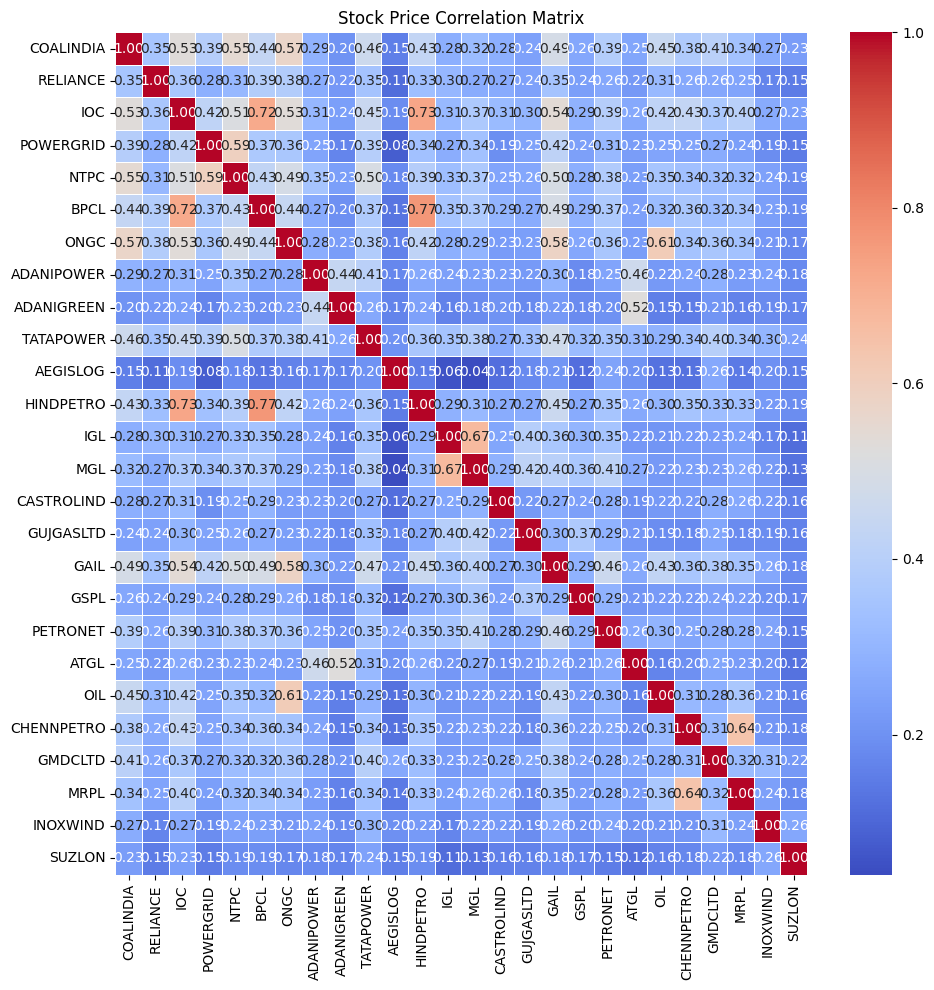

COALINDIA
Top 3: ONGC    0.569098
NTPC    0.548950
IOC     0.530294
Name: COALINDIA, dtype: float64
Bottom 3: AEGISLOG      0.154348
ADANIGREEN    0.203573
SUZLON        0.228964
Name: COALINDIA, dtype: float64
RELIANCE
Top 3: BPCL    0.385842
ONGC    0.384091
IOC     0.355732
Name: RELIANCE, dtype: float64
Bottom 3: AEGISLOG    0.112762
SUZLON      0.147312
INOXWIND    0.169572
Name: RELIANCE, dtype: float64
IOC
Top 3: HINDPETRO    0.729460
BPCL         0.717294
GAIL         0.541936
Name: IOC, dtype: float64
Bottom 3: AEGISLOG      0.188284
SUZLON        0.232920
ADANIGREEN    0.235400
Name: IOC, dtype: float64
POWERGRID
Top 3: NTPC    0.591972
IOC     0.419411
GAIL    0.418391
Name: POWERGRID, dtype: float64
Bottom 3: AEGISLOG      0.078820
SUZLON        0.148953
ADANIGREEN    0.171631
Name: POWERGRID, dtype: float64
NTPC
Top 3: POWERGRID    0.591972
COALINDIA    0.548950
IOC          0.511144
Name: NTPC, dtype: float64
Bottom 3: AEGISLOG    0.179794
SUZLON      0.187884
ATGL       

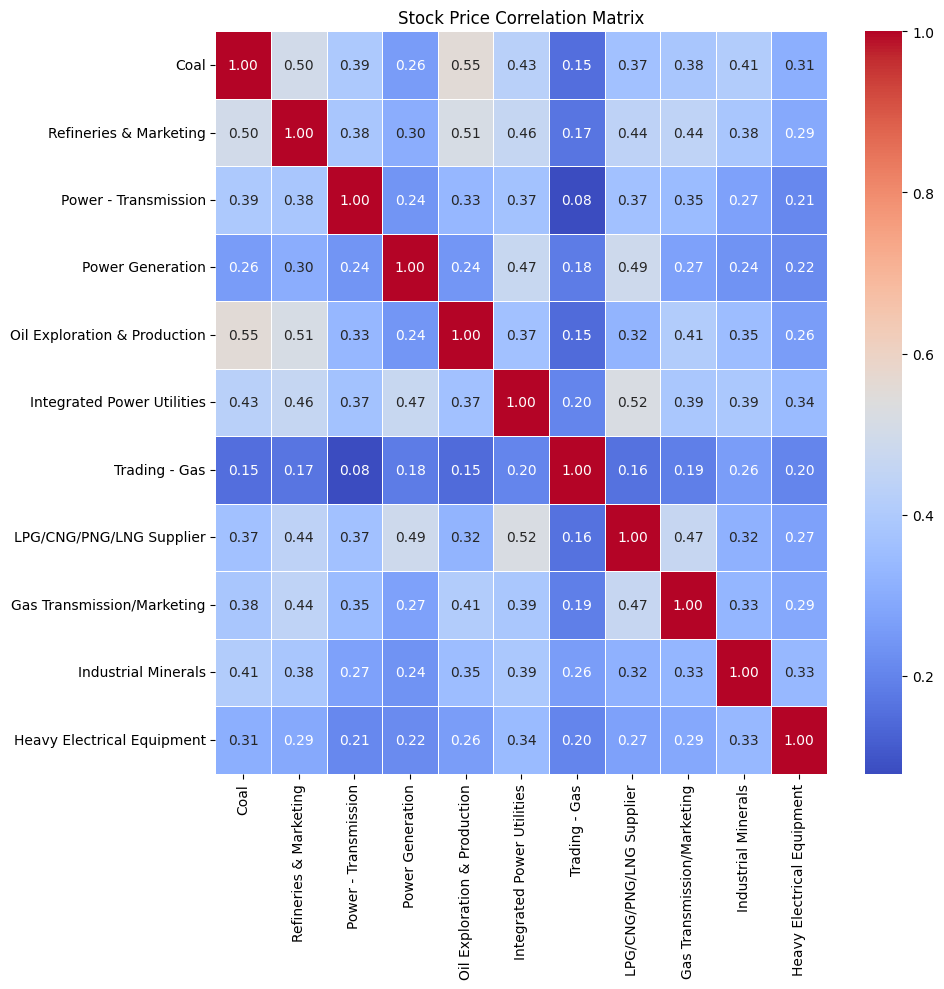

Coal
Top 3: Oil Exploration & Production    0.554976
Refineries & Marketing          0.499619
Integrated Power Utilities      0.426539
Name: Coal, dtype: float64
Bottom 3: Trading - Gas                 0.154348
Power Generation              0.258731
Heavy Electrical Equipment    0.305847
Name: Coal, dtype: float64
Refineries & Marketing
Top 3: Oil Exploration & Production    0.514563
Coal                            0.499619
Integrated Power Utilities      0.462552
Name: Refineries & Marketing, dtype: float64
Bottom 3: Trading - Gas                 0.166557
Heavy Electrical Equipment    0.292222
Power Generation              0.303764
Name: Refineries & Marketing, dtype: float64
Power - Transmission
Top 3: Coal                          0.392577
Refineries & Marketing        0.381776
Integrated Power Utilities    0.368556
Name: Power - Transmission, dtype: float64
Bottom 3: Trading - Gas                 0.078820
Heavy Electrical Equipment    0.211338
Power Generation              0.240364

In [21]:
correlation_matrix(stock_data)
correlation_matrix(industry_data)

In [ ]:
# TIME SERIES FORECASTING

# for item in stock_data:
#    train_and_forecast(item, stock_data, period = 'Daily', target = 'Price', split_start_date= '2014-01-01')
# for item in Month_df:
#    train_and_forecast(item, Month_df, period = 'Monthly', target = 'Price', split_start_date= '2014-01-01')
# for item in industry_data:
#    train_and_forecast(item, industry_data, period = 'Daily', target = 'Price', split_start_date= '2014-01-01')
# for item in Month_df_industry:
#    train_and_forecast(item, Month_df_industry, period = 'Monthly', target = 'Price', split_start_date= '2014-01-01')

In [ ]:
summarize_results()

No results available. Ensure the training step was executed correctly.


In [ ]:
# LSTM FORECASTING

In [ ]:
# !pip install jax==0.5.1 jaxlib==0.5.1

In [ ]:
# !pip uninstall jax jaxlib -y

In [ ]:
# !pip uninstall numpy -y
# !pip uninstall pandas -y
# !pip uninstall tensorflow -y

In [ ]:
# !pip install numpy==1.22.4
# !pip install tensorflow==2.9.0
# !pip install pandas
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import itertools
import keras_tuner as kt
import joblib

In [ ]:
# Scaling data

def scale_data(df):
  df = pd.DataFrame(df)


  scaler = MinMaxScaler(feature_range = (0, 1))
  df_scaled = scaler.fit_transform(df.values.reshape(-1, 1))

  return df_scaled

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
best_hparameters = {}

def train_lstm(item, df, time_step = 1, epochs = 1):


  try:
    # Scaling data
    scaler = MinMaxScaler(feature_range = (0, 1))
    df_scaled = scaler.fit_transform(np.array(df).reshape(-1, 1))

    # Splitting data
    training_size = int(len(df_scaled) * 0.75)
    train_data = df_scaled[:training_size]
    test_data = df_scaled[training_size:]




    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Reshaping data for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # time_step = min(time_step, int(0.2*len(train_data)), int (0.2*len(test_data)))

    def model_building(hp):
      model = Sequential()
      model.add(LSTM(units = hp.Int('unit_1', min_value = 32, max_value=128, step = 16), activation = 'relu', return_sequences = True, input_shape = (time_step, 1)))

      model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=16), activation = 'relu', return_sequences=True))

      model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=128, step=16)))
      model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.1, 0.2, 0.3])))

      model.add(Dense(1))


      optimizer_name = hp.Choice('optimizer', ['adam', 'rmsprop'])
      learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

      if optimizer_name == 'adam':
          optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      elif optimizer_name == 'rmsprop':
          optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)


      model.compile(
          loss = 'mean_squared_error',
          optimizer =optimizer,
          metrics = ['mse'])

      return model



    tuner = kt.RandomSearch(
    model_building,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_logs',
    project_name=f'{item}_tuning'
)

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
    tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[es])

    best_model = tuner.get_best_models(num_models=1)[0]
    best_hp = tuner.get_best_hyperparameters()[0]

    print(f"Best hyperparameters for {item}: {best_hp.values}")
    best_hparameters[item] = best_hp.values



    # Training the model
    history = best_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 64, callbacks = [es])


    model_path = f"models/{item}_lstm_model.h5"
    best_model.save(model_path)
    print(f"✅ Model saved to {model_path}")


    scaler_path = f"models/{item}_scaler.save"
    joblib.dump(scaler, scaler_path)
    print(f"✅ Scaler saved to {scaler_path}")




    fig = plt.figure(figsize = (20, 7))

    # Adding Subplot 1 (For accuracy)
    fig.add_subplot(121)

    # Accuracy
    plt.plot(history.epoch, history.history['mse'], label = 'mse')
    plt.plot(history.epoch, history.history['val_mse'], label = 'val_mse')

    plt.title(f"MSE - {item}", fontsize = 18)
    plt.xlabel("Epochs", fontsize = 15)
    plt.ylabel("MSE", fontsize = 15)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.savefig(f"MSE_ValMSE_{item}.png")


    results = best_model.evaluate(X_test, y_test)
    print("test loss, test acc:", np.round(results,4))


    # Plotting loss

  except(IndexError, UnboundLocalError) as e:
    print(f"⚠️ Insufficient data for LSTM. \n Skipping {item} due to {e}")
    return

  # Prediction
  train_predict = best_model.predict(X_train)
  test_predict = best_model.predict(X_test)

  # Inverse transformation
  train_predict = scaler.inverse_transform(train_predict)
  test_predict = scaler.inverse_transform(test_predict)
  y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
  y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

  # Performance metrics
  mse_train = mean_squared_error(y_train, train_predict)
  mse_test = mean_squared_error(y_test, test_predict)

  mae_train = mean_absolute_error(y_train, train_predict)
  mae_test = mean_absolute_error(y_test, test_predict)

  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)

  mape_train = np.mean(np.abs(train_predict - y_train) / np.abs(y_train))
  mape_test = np.mean(np.abs(test_predict - y_test) / np.abs(y_test))




  # Results
  Results[item] = {
      'Train MSE': mse_train,
      'Test MSE': mse_test,

      'Train MAE': mae_train,
      'Test MAE': mae_test,

      'Train RMSE': rmse_train,
      'Test RMSE': rmse_test,

      'Train MAPE': mape_train,
      'Test MAPE': mape_test
    }

  plt.figure(figsize=(12, 6))
  plt.plot(df.index[:len(y_train)], y_train, label='Train Data', color='orange')
  plt.plot(df.index[len(y_train):(len(y_train) + len(y_test))], y_test, label='Test Data', color='red')
  plt.plot(df.index[:len(train_predict)], train_predict, label='Train Prediction', color='blue')
  plt.plot(df.index[len(y_train):(len(y_train) + len(test_predict))], test_predict, label='Test Prediction', color='green')

  plt.title(f"{item} - Actual vs Forecast")
  plt.xlabel("Date")
  plt.ylabel("Stock Price")
  plt.legend()
  plt.grid()
  plt.savefig(f"Daily_LSTM_{item}.png")
  plt.show()


In [ ]:
Results = {}
start_date='2014-01-01'

# To train all the stocks

def train_all(database):
  for item in database:
    try:
      train_lstm(item, database[item]['adj close'].loc[start_date:], time_step = 20, epochs = 100)
      print(f"✅ Training complete for {item}")
    except (ValueError) as e:
      print(f"⚠️ Skipping {item} due to {e}")




In [ ]:
# train_all(industry_data)
train_all(stock_data)
# train_all(Month_df_industry)
# train_all(Month_df)

Trial 2 Complete [00h 08m 49s]
val_loss: 0.0015931646339595318

Best val_loss So Far: 0.0015931646339595318
Total elapsed time: 00h 12m 12s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |128               |unit_1
128               |48                |units_2
48                |48                |units_3
0.3               |0.2               |dropout_rate
adam              |rmsprop           |optimizer
0.0001            |0.001             |learning_rate

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0524 - val_mse: 0.0524
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.7652e-04 - mse: 6.7652e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.0840e-04 - mse: 5.0840e-04 - val_loss: 0.0050 - val_mse: 0.0050
Epo

In [ ]:
|

In [ ]:
Results

{'Oil Exploration and Production': {'Train MSE': 128.94837467364425,
  'Test MSE': 782.9285913061002,
  'Train MAE': 8.152173981606325,
  'Test MAE': 22.266029618647266,
  'Train RMSE': np.float64(11.355543785906699),
  'Test RMSE': np.float64(27.980861160909615),
  'Train MAPE': np.float64(0.038700382267885455),
  'Test MAPE': np.float64(0.043926487151459845)},
 'Coal': {'Train MSE': 49.52929351206467,
  'Test MSE': 560.6391647835673,
  'Train MAE': 5.419948937478172,
  'Test MAE': 17.8766429612045,
  'Train RMSE': np.float64(7.03770513108248),
  'Test RMSE': np.float64(23.677820102018835),
  'Train MAPE': np.float64(0.0417880460557327),
  'Test MAPE': np.float64(0.054271425446140456)},
 'Power Generation or Distribution': {'Train MSE': 6.330977856895794,
  'Test MSE': 287.0160523388612,
  'Train MAE': 1.5390056092491187,
  'Test MAE': 13.109269509166701,
  'Train RMSE': np.float64(2.5161434491888164),
  'Test RMSE': np.float64(16.941548109274464),
  'Train MAPE': np.float64(0.0199596

In [ ]:
best_hparameters

{'Oil Exploration and Production': {'unit_1': 64,
  'dropout_rate': 0.2,
  'units_2': 32,
  'units_3': 80,
  'optimizer': 'adam',
  'learning_rate': 0.001},
 'Coal': {'unit_1': 32,
  'dropout_rate': 0.3,
  'units_2': 128,
  'units_3': 64,
  'optimizer': 'rmsprop',
  'learning_rate': 0.0001},
 'Power Generation or Distribution': {'unit_1': 80,
  'dropout_rate': 0.1,
  'units_2': 48,
  'units_3': 128,
  'optimizer': 'adam',
  'learning_rate': 0.001},
 'Renewables': {'unit_1': 32,
  'dropout_rate': 0.2,
  'units_2': 96,
  'units_3': 80,
  'optimizer': 'rmsprop',
  'learning_rate': 0.01},
 'Refineries': {'unit_1': 48,
  'dropout_rate': 0.1,
  'units_2': 64,
  'units_3': 48,
  'optimizer': 'adam',
  'learning_rate': 0.001},
 'Gas distribution': {'unit_1': 64,
  'dropout_rate': 0.1,
  'units_2': 128,
  'units_3': 112,
  'optimizer': 'rmsprop',
  'learning_rate': 0.01},
 'Lubricants': {'unit_1': 80,
  'dropout_rate': 0.3,
  'units_2': 48,
  'units_3': 128,
  'optimizer': 'rmsprop',
  'learnin